**Task List**

Your written report should include written text summaries and graphics of the following:

* Data validation:

   * Describe validation and cleaning steps for every column in the data

* Exploratory Analysis:

   * Include two different graphics showing single variables only to demonstrate the characteristics of data

   * Include at least one graphic showing two or more variables to represent the relationship between features

   * Describe your findings

* Definition of a metric for the business to monitor

   * How should the business use the metric to monitor the business problem

   * Can you estimate initial value(s) for the metric based on the current data

* Final summary including recommendations that the business should undertake



**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**READING THE DATA**

In [ ]:
sales_data = pd.read_excel(r'C:\Users\USER\Desktop\product_sales.xlsx')
sales_data


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


**SHAPE OF DATA**

In [ ]:
sales_data.shape


(15000, 8)

**DESCRIPTIVE ANALYSIS**

In [ ]:
sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [ ]:
sales_data.describe()


,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [ ]:
# Check the value counts to ensure there are only 3 unique values
print(sales_data['sales_method'].value_counts())


sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64


**MAPPING INCONSISTENT COLUMNS**

In [ ]:
# Define a mapping dictionary to correct the inconsistent values
sales_method_mapping = {
    'Email': 'Email',
    'Call': 'Call',
    'Email + Call': 'Email + Call',
    'em + call': 'Email + Call',
    'email': 'Email'
}

# Apply the mapping to the 'sales_method' column
sales_data['sales_method'] = sales_data['sales_method'].map(sales_method_mapping)

# Check the value counts to ensure there are only 3 unique values
print(sales_data['sales_method'].value_counts())


sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


**CUSTOMER BY SALES METHOD**

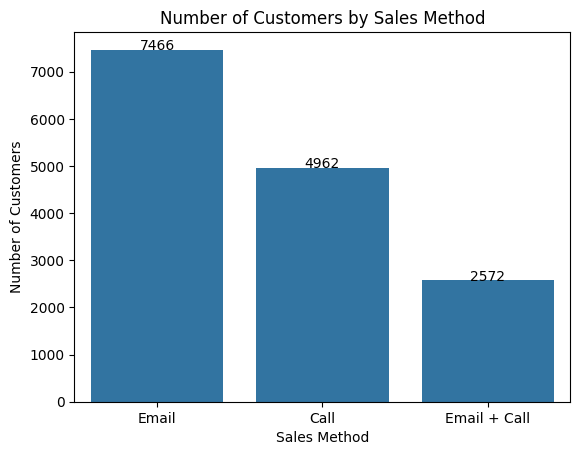

In [ ]:
customers_by_sales_method = sales_data['sales_method'].value_counts()

ax = sns.barplot(x=customers_by_sales_method.index, y=customers_by_sales_method.values)

plt.title("Number of Customers by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Number of Customers")

# Add value labels to each bar
for i, v in enumerate(customers_by_sales_method.values):
    ax.text(i, v + 0.5, str(v), ha='center')

plt.show()


**AVERAGE REVENUE BY SALES METHOD**

In [ ]:
# find mean revenue for each sales method
mean_revenue_by_sales_method = sales_data.groupby('sales_method')['revenue'].mean()
print(mean_revenue_by_sales_method)


sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64


**REPLACING NULL VALUES IN THE REVENUE COLUMN WITH MEAN**

In [ ]:
def replace_null_revenue(row):
    """
    Replaces null (NaN) values in the 'revenue' column of a pandas DataFrame with the mean (or median) revenue
    for the corresponding 'sales_method' group.

    Parameters:
    -----------
    row : pandas Series
        A single row of a pandas DataFrame containing the 'revenue' and 'sales_method' columns.

    Returns:
    --------
    float
        The value of the 'revenue' column for the given row, either the original value if it is not null, or
        the mean (or median) revenue for the corresponding 'sales_method' group if it is null.
    """
    if pd.isnull(row['revenue']):
        return mean_revenue_by_sales_method[row['sales_method']]
    else:
        return row['revenue']


In [ ]:
# apply function to the revenue column
sales_data['revenue'] = sales_data.apply(replace_null_revenue, axis=1)

# check for any null values in the revenue column
print(sales_data['revenue'].isnull().sum())


0


**REPLACING YEARS ABOVE 41 YEARS WITH 41 AS THE COMPANY STARTED IN 1984....41 YEARS FROM NOW**

In [ ]:
# this company was founded in 1984 making it 41 years now, replacing customers with above 41yrs with 41 yrs

sales_data.loc[sales_data['years_as_customer'] > 41, 'years_as_customer'] = 41


In [ ]:
# check number of unique values for state

sales_data['state'].nunique()


50

In [ ]:
sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


**HISTPLOT OF OVERALL REVENUE**

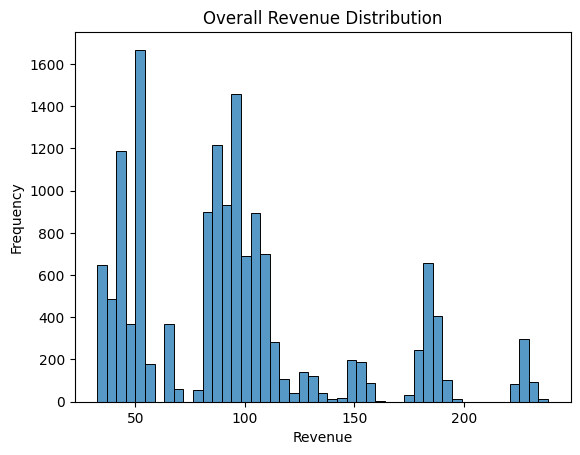

In [ ]:
# Histogram for overall revenue

sns.histplot(sales_data['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Overall Revenue Distribution')
plt.show()


**Revenue by Sales Method**

sales_method
Call            236178.631537
Email           725155.290202
Email + Call    472350.970166
Name: revenue, dtype: float64


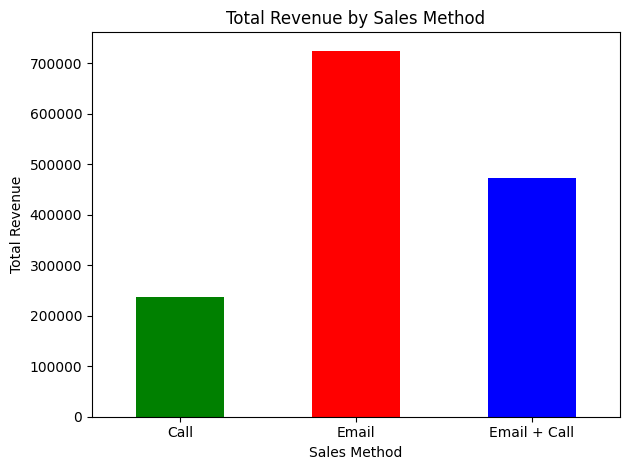

In [71]:

# Group by sales_method and sum the revenue
print(sales_data.groupby('sales_method')['revenue'].sum())

# Plot the result as a bar chart
sales_data.groupby('sales_method')['revenue'].sum().plot(
    kind='bar',
    color=['green', 'red', 'blue'],
    title='Total Revenue by Sales Method'
)

plt.ylabel('Total Revenue')
plt.xlabel('Sales Method')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


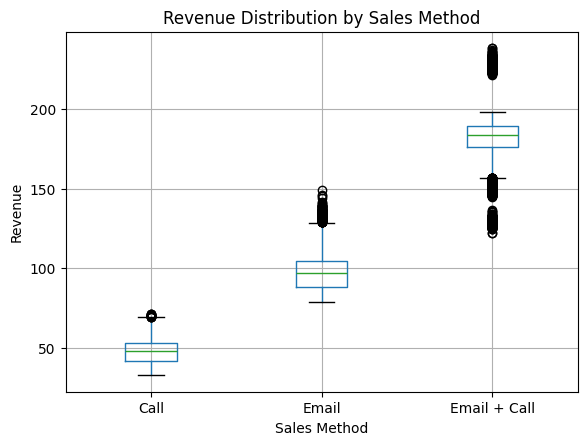

In [ ]:
sales_data.boxplot(column='revenue', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Revenue Distribution by Sales Method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()


**Weekly Sales Method Revenue**

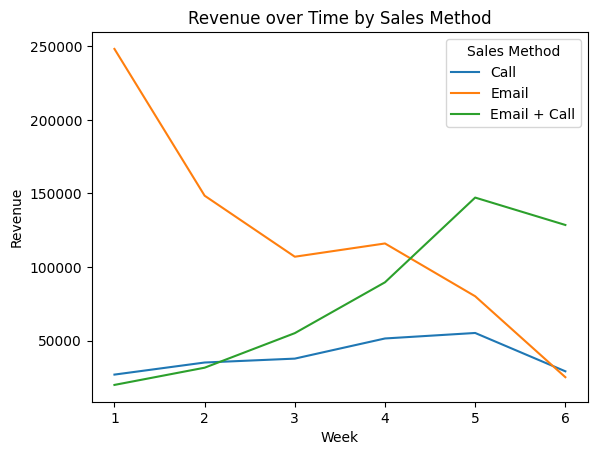

In [ ]:
revenue_over_time = sales_data.groupby(['week', 'sales_method'])['revenue'].sum().unstack()
revenue_over_time.plot()
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Revenue over Time by Sales Method')
plt.legend(title='Sales Method')
plt.show()


* From the table above we see following:

In week 1, the `'Email'` sales method generated the highest revenue **($248,122.68)**, followed by `'Email + Call'` **($20,007.40)** and `'Call'` **($27,015.93)**. However, it is important to note that the 'Email' method required the least effort from the sales team, making it the most efficient method during the first week. Over the course of the 6 weeks sales generated from the Email sales method consistently decreased. This decline in revenue overtime could indicate diminishing returns from the Email sales method as time goes on. The call method shows an overall incresing trend in revenue overtime with some fluctations. Towards the end of the 6 week period the amount of revenue generated from the Call method began to decrease. The Email + Call method shows a healthy increasing trend of revenue over the 6 week period. It's possible that this method would be the most beneficial in terms of long-term revenue growth compared to the two other sales methods. In conclusion, the Email + Call sales method appears to be the most promising in terms of long-term revenue generation, although it does require more effort from the sales team. The Email method starts strong but shows a steady decline, while the Call method has an overall increasing trend but fluctuates more. It is recommended to consider the efficiency and effort required for each method while making a decision on which sales method to continue using.

In [ ]:
revenue_over_time


sales_method,Call,Email,Email + Call
week,,,
1,27015.934407,248122.682313,20007.400954
2,35219.944012,148478.487577,31702.115744
3,37865.583880,107047.993157,55164.933140
4,51545.486149,116044.223157,89682.576419
5,55279.216281,80201.111052,147195.006815
6,29252.466808,25260.792947,128598.937094


**CUSTOMER YEARS BY SALES METHOD**

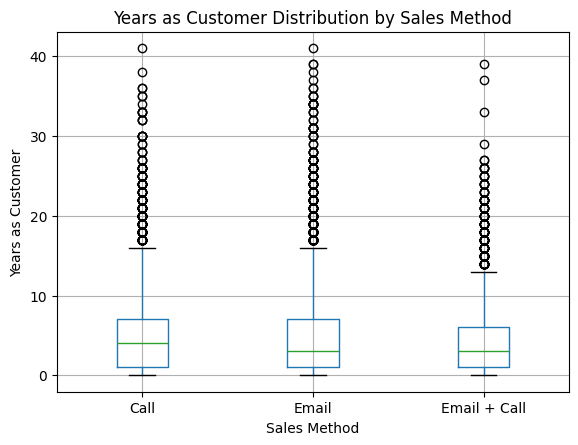

In [54]:
# Example: Boxplot for years_as_customer by sales_method
sales_data.boxplot(column='years_as_customer', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')
plt.title('Years as Customer Distribution by Sales Method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()



**NUMBER SOLD BY SALES METHOD**

sales_method
Call            47187
Email           72639
Email + Call    31444
Name: nb_sold, dtype: int64


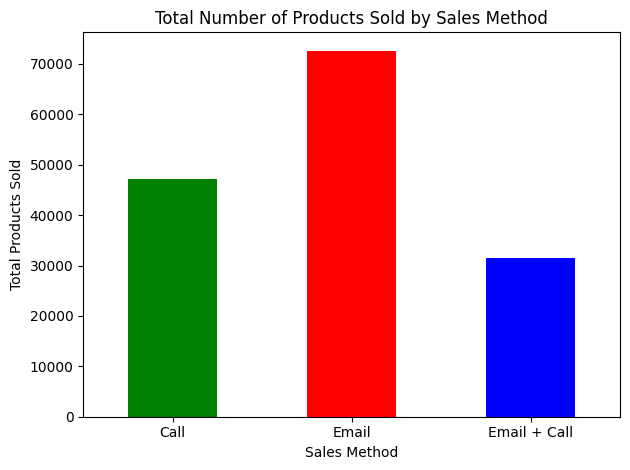

In [72]:

# Print total number sold by each sales method
print(sales_data.groupby('sales_method')['nb_sold'].sum())

# Plot the result as a bar chart
sales_data.groupby('sales_method')['nb_sold'].sum().plot(
    kind='bar',
    color=['green', 'red', 'blue'],
    title='Total Number of Products Sold by Sales Method'
)

plt.xlabel('Sales Method')
plt.ylabel('Total Products Sold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


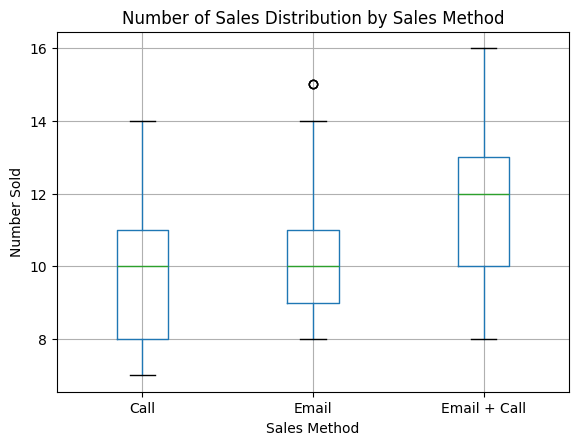

In [ ]:
# Example: Boxplot for years_as_customer by sales_method
sales_data.boxplot(column='nb_sold', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Number Sold')
plt.title('Number of Sales Distribution by Sales Method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()

# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)


**SITES VISIT BY SALES METHOD**

sales_method
Call            121191
Email           184816
Email + Call     68856
Name: nb_site_visits, dtype: int64


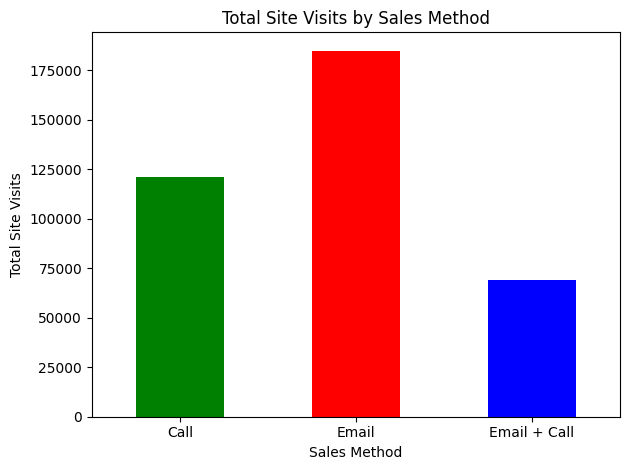

In [73]:
import matplotlib.pyplot as plt

# Print total site visits by each sales method
print(sales_data.groupby('sales_method')['nb_site_visits'].sum())

# Plot bar chart of total site visits by sales method
sales_data.groupby('sales_method')['nb_site_visits'].sum().plot(
    kind='bar',
    color=['green', 'red', 'blue'],
    title='Total Site Visits by Sales Method'
)

plt.xlabel('Sales Method')
plt.ylabel('Total Site Visits')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


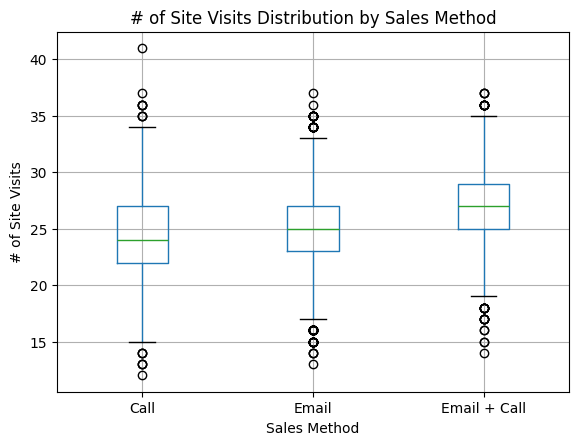

In [ ]:
# Example: Boxplot for years_as_customer by sales_method
sales_data.boxplot(column='nb_site_visits', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('# of Site Visits')
plt.title('# of Site Visits Distribution by Sales Method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()


**AVERAGE REVENUE PER CUSTOMER IN EACH SALES METHOD**

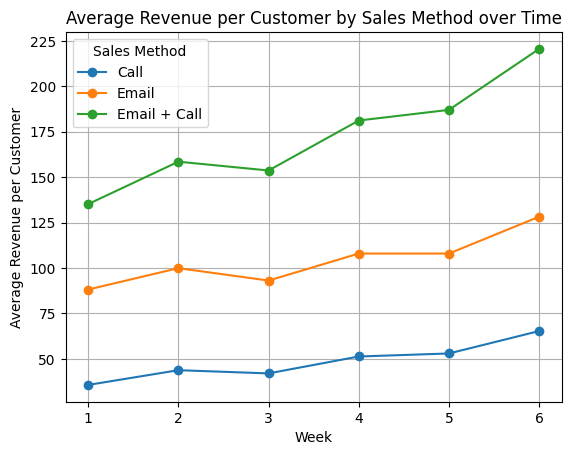

In [ ]:
grouped_data = sales_data.groupby(['week', 'sales_method']).agg({'revenue': 'sum', 'customer_id': 'count'}).reset_index()
grouped_data['average_revenue_per_customer'] = grouped_data['revenue'] / grouped_data['customer_id']
pivot_data = grouped_data.pivot_table(index='week', columns='sales_method', values='average_revenue_per_customer')
pivot_data.plot(kind='line', marker='o')
plt.xlabel('Week')
plt.ylabel('Average Revenue per Customer')
plt.title('Average Revenue per Customer by Sales Method over Time')
plt.legend(title='Sales Method')
plt.grid()
plt.show()


Defining Business Metrics to Track Performance - Average Revenue per Customer Sales Effort To get a better understanding of the performance of each sales method I created a metric called Average Reveue per Customer Sales Effort(ARPSE). 

This metric takes into account the difficulty of each sales method in terms of time spent with email having a value of 0.5, email + call 1 and call 3.

ARCPM = (Total Revenue for Method) / (Number of customers * Sales effort)

In [ ]:
# Define the sales effort for each sales method
sales_effort = {
    'Email': 0.5,
    'Call': 3,
    'Email + Call': 1
}

# Group the data by sales_method and aggregate the total revenue and number of customers
grouped_data = sales_data.groupby('sales_method').agg({'revenue': 'sum', 'customer_id': 'count'}).reset_index()

# Calculate ARCPSE for each sales method
grouped_data['ARCPSE'] = grouped_data.apply(lambda row: row['revenue'] / (row['customer_id'] * sales_effort[row['sales_method']]), axis=1)

# Display the ARCPSE for each sales method
print(grouped_data[['sales_method', 'ARCPSE']])


   sales_method      ARCPSE
0          Call   15.865822
1         Email  194.255368
2  Email + Call  183.651233



The `ARCPSE` results show that Email has the highest value with **$194.25**, followed by Email + Call with **$183.65** and finally call with **$15.86**. This suggests that the call method is the most efficient in terms of reveneue generated per unit of effort.

However, it is important to note that additional factors have been observed. The 'Email + Call' method had customers with more website visits and higher average number of items purchased. Moreover, this method demonstrated a steady increase in revenue growth over the six-week period. In contrast, the 'Call' method showed high revenue in week 1 but decreased over time.

Conclusion and Recommendations Taking in all factors from the analysis it is recommended to focus on the Email + Call method for the following reasons:

While 'Email' has the highest ARCPSE, the 'Email + Call' method generates more customer engagement, as evidenced by higher website visits and average items purchased. This could lead to stronger customer relationships and long-term growth. The 'Email + Call' method has shown a consistent upward trend in revenue generation over six weeks, indicating its potential for continued success. The 'Call' method is the least efficient in terms of effort and revenue generation and has a downward trend in revenue over time. In conclusion, the 'Email + Call' method should be prioritized for sales efforts, as it demonstrates better customer engagement, consistent revenue growth, and a more sustainable balance between effort and return.